In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Connect to SQLite database (creates if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [4]:
# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [5]:
# Insert sample data (skip if already inserted)
sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 20, 1.0),
    ('Oranges', 15, 1.8),
    ('Apples', 5, 2.5),
    ('Bananas', 10, 1.0),
    ('Oranges', 10, 1.8)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [6]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


In [7]:
print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         30     30.0
2  Oranges         25     45.0


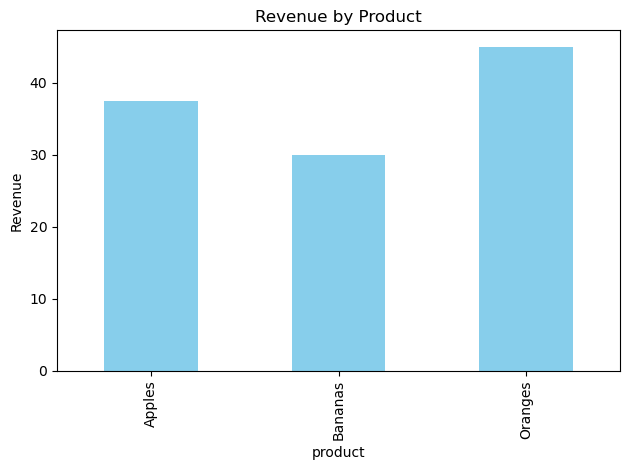

In [8]:
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save the chart
plt.show()

In [9]:
conn.close()